In [7]:
import geopandas as gpd
import os
import pandas as pd

In [3]:
# Specify the full path to the shapefile

path= os.getcwd()
shapefile_path = path + '/Shape File/ne_110m_admin_1_states_provinces.shp'

# Load the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame
print(gdf.head())

           featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   
2  Admin-1 scale rank          2  USA-3516     3516      US-ND   
3  Admin-1 scale rank          2  USA-3517     3517      US-HI   
4  Admin-1 scale rank          2  USA-3518     3518      US-ID   

                                   wikipedia iso_a2  adm0_sr          name  \
0     http://en.wikipedia.org/wiki/Minnesota     US        1     Minnesota   
1       http://en.wikipedia.org/wiki/Montana     US        1       Montana   
2  http://en.wikipedia.org/wiki/North_Dakota     US        1  North Dakota   
3        http://en.wikipedia.org/wiki/Hawaii     US        8        Hawaii   
4         http://en.wikipedia.org/wiki/Idaho     US        1         Idaho   

    name_alt  ... FCLASS_ID FCLASS_PL FCLASS_GR FCLASS_IT FCLASS_NL FCLASS_SE  \
0   MN|Minn.  ...      None      None      None      

<Axes: >

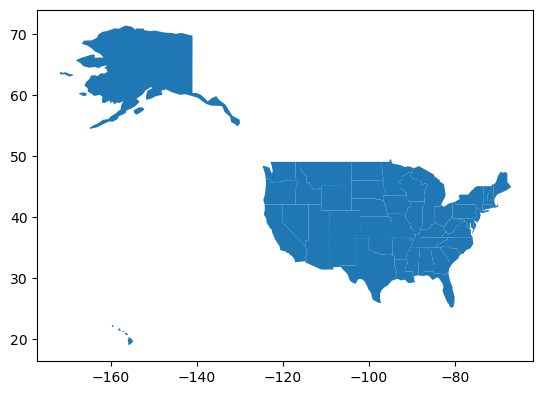

In [5]:
gdf.plot()

In [8]:
# Example: Patent assignment dataset
patent_assignments_url = 'https://developer.uspto.gov/data/patent/assignment/2024/patent_assignment_2024.csv'
patent_assignments = pd.read_csv(patent_assignments_url)

HTTPError: HTTP Error 404: Not Found

In [10]:
import google.cloud
from google.cloud import bigquery

client = bigquery.Client()
query = """
SELECT *
FROM `patents-public-data.patents.publications`
LIMIT 1000
"""
patents = client.query(query).to_dataframe()

ModuleNotFoundError: No module named 'google'

In [14]:
pip install google-cloud-bigquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.4/156.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.0/209.0 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 41.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
from google.cloud import bigquery

client = bigquery.Client()
query = """
SELECT *
FROM `patents-public-data.patents.publications`
LIMIT 1000
"""
patents = client.query(query).to_dataframe()

DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

To use the USPTO PatentsView API to access patent data, follow these steps:

1. **Get an API Key**:
   - First, you need to request an API key from the [PatentsView API website](https://patentsview.org/apis/purpose).

2. **Understand the API Endpoints**:
   - The PatentsView API provides several endpoints to query different types of patent data. For example:
     - `/api/patents/query`: To search for patents.
     - `/api/inventors/query`: To search for inventors.
     - `/api/assignees/query`: To search for assignees (companies or individuals who own the patents).

3. **Formulate Your Query**:
   - You can use various parameters to filter and sort your data. Here’s a basic example of how to query patents:
     ```python
     import requests

     # Replace 'YOUR_API_KEY' with your actual API key
     api_key = 'YOUR_API_KEY'
     url = 'https://api.patentsview.org/patents/query'
     params = {
         'q': '{"_gte":{"patent_date":"2020-01-01"}}',  # Example query to get patents from 2020 onwards
         'f': '["patent_number", "patent_title", "patent_date"]',  # Fields to return
         'o': '{"per_page":100}',  # Options like number of results per page
         'api_key': api_key
     }

     response = requests.get(url, params=params)
     data = response.json()
     print(data)
     ```

4. **Explore the API Documentation**:
   - Detailed documentation is available on the [PatentsView API documentation page](https://patentsview.org/apis/api-endpoints/patents)¹(https://patentsview.org/apis/api-endpoints/patents). This will help you understand the various query parameters, filters, and fields you can use.

5. **Example Query**:
   - Here’s an example of querying the API to get patents related to "machine learning":
     ```python
     import requests

     api_key = 'YOUR_API_KEY'
     url = 'https://api.patentsview.org/patents/query'
     params = {
         'q': '{"_text_any":{"patent_title":"machine learning"}}',
         'f': '["patent_number", "patent_title", "patent_date"]',
         'o': '{"per_page":100}',
         'api_key': api_key
     }

     response = requests.get(url, params=params)
     data = response.json()
     for patent in data['patents']:
         print(f"Patent Number: {patent['patent_number']}, Title: {patent['patent_title']}, Date: {patent['patent_date']}")
     ```

These steps should help you get started with accessing and exploring patent data using the PatentsView API. If you have any specific queries or need further assistance, feel free to ask!

Source: Conversation with Copilot, 10/21/2024
(1) Patents Endpoint | PatentsView. https://patentsview.org/apis/api-endpoints/patents.

Yes, you can use the new PatentSearch API to access patent data and then spatially plot the locations of patents. Here’s a step-by-step guide on how to achieve this:

1. **Access the Patent Data**:
   - Use the PatentSearch API to query patent data, including location information. You can find the API documentation and endpoints [here](https://developer.uspto.gov/api-catalog).

2. **Extract Location Information**:
   - Ensure your query includes fields that provide location data, such as the assignee's address or inventor's address.

3. **Convert Address to Coordinates**:
   - Use a geocoding service (like Google Maps API or OpenStreetMap's Nominatim) to convert addresses to latitude and longitude coordinates.

4. **Create a GeoDataFrame**:
   - Use GeoPandas to create a GeoDataFrame from the coordinates.

5. **Plot the Data**:
   - Use GeoPandas and Matplotlib to plot the spatial data.

Here’s an example workflow:

### Step 1: Query Patent Data
```python
import requests

api_key = 'YOUR_API_KEY'
url = 'https://api.patentsview.org/patents/query'
params = {
    'q': '{"_gte":{"patent_date":"2020-01-01"}}',
    'f': '["patent_number", "patent_title", "assignee_city", "assignee_state", "assignee_country"]',
    'o': '{"per_page":100}',
    'api_key': api_key
}

response = requests.get(url, params=params)
patent_data = response.json()
```

### Step 2: Geocode Addresses
```python
from geopy.geocoders import Nominatim
import pandas as pd

geolocator = Nominatim(user_agent="patent_locator")
locations = []

for patent in patent_data['patents']:
    address = f"{patent['assignee_city']}, {patent['assignee_state']}, {patent['assignee_country']}"
    location = geolocator.geocode(address)
    if location:
        locations.append({
            'patent_number': patent['patent_number'],
            'title': patent['patent_title'],
            'latitude': location.latitude,
            'longitude': location.longitude
        })

df = pd.DataFrame(locations)
```

### Step 3: Create GeoDataFrame and Plot
```python
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))
gdf.plot(ax=ax, color='red', markersize=5)
plt.show()
```

This workflow will help you visualize the spatial distribution of patents using the PatentSearch API. If you need further assistance or have specific requirements, feel free to ask!

In [2]:
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.6 MB/s eta 0:00:00


In [3]:
from geopy.geocoders import Nominatim
import pandas as pd

geolocator = Nominatim(user_agent="patent_locator")
locations = []

for patent in patent_data['patents']:
    address = f"{patent['assignee_city']}, {patent['assignee_state']}, {patent['assignee_country']}"
    location = geolocator.geocode(address)
    if location:
        locations.append({
            'patent_number': patent['patent_number'],
            'title': patent['patent_title'],
            'latitude': location.latitude,
            'longitude': location.longitude
        })

df = pd.DataFrame(locations)

NameError: name 'patent_data' is not defined

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))
gdf.plot(ax=ax, color='red', markersize=5)
plt.show()
